# Wave equation 2D
The acoustic equations of motion in two
dimension are
%
\begin{eqnarray}
  \rho(x,z)\ddot{u}_x(x,z,t)  & = & \partial_x \sigma(x,z,t),\\
  \rho(x,z)\ddot{u}_z(x,z,t)   & = & \partial_z\sigma(x,z,t).
                                        \label{eq:ch4-motion}
\end{eqnarray}
and the constitutive equation is
\begin{eqnarray}
  \sigma(x,z,t) & = & \kappa(x,z)\left[\partial_x u_x(x,z,t)+ \partial_z u_z(x,z,t)\right] +s(x,z,t)\nonumber\\
                                              \label{eq:ch4-stress}
\end{eqnarray}

Here:

  - $\ddot{u} = \partial^2_t u$
  - $x,z$ : Horisontal and vertical coordinates
  - $t$ : time
  - $u_x(x,z,t)$ : Horizontal component of displacement
  - $u_z(x,z,t)$ : Vertical component of displacement
  - $\sigma(x,z,t)$ : Stress
  - $\kappa(x,z)$ : Bulk modulus
  - $\rho(x,z)$ : Density
  - $s(x,z,t)$ : Source function

##  Numerical Grid in 2D
  - $\Delta z$,$\Delta x$: Grid interval in horizontal and vertical direction
  - $\Delta t$: Time sampling interval
  - $N_x$, $N_z$: No of gridpoints in horizontal and vertical direction
  - $N_t$: No of time samples
\begin{eqnarray}
    x & = & k\Delta x,  k  = 0, ..., N_x-1,   \nonumber\\
    z & = & l\Delta z,  l  =  0, ..., N_z-1,   \nonumber \\
    t & = & m\Delta z,  m  =  0, ..., N_t-1.   \nonumber \\
                                  \label{eq:ch4-21b}
\end{eqnarray}



\begin{eqnarray}
    \ddot{\sigma}(x,z,t) = \kappa(z) [\partial_x \ddot{u_x}(x,z,t) + \partial_z \ddot{u_z}(x,z,t)] +\ddot{s}(x,z,t).
                                                \label{eq:ch4-500}
\end{eqnarray}

The second order time derivative on the left hand side of the constitutive equation for stress is
approximated with

\begin{eqnarray}
\ddot{\sigma}(x,z,t)& \approx &
      \frac{\sigma(x,z,t+\Delta t) -2\sigma(x,z,t) +\sigma(x,z,t-\Delta t)}{(\Delta t)^2}. \nonumber\\
                                                         \label{eq:ch4-501}
\end{eqnarray}


If we insert the above equation  on the left hand side of the previous equation above and solve
for $\sigma(x,z,t+\Delta t)$, we get


\begin{eqnarray}
    \sigma(x,z,t+\Delta t)           & = &2\sigma(x,z,t) - \sigma(x,z,t-\Delta t) \nonumber\\
                       & + &\Delta t^2\kappa(x,z)[\partial_{x} \ddot{u}_x(x,z,t) + \partial_{z} \ddot{u}_z(x,z,t)] \nonumber\\
                         & + &\Delta t^2 \ddot{s}(x,z,t)\nonumber\\.
                                                       \label{eq:ch4-502}
\end{eqnarray}


The centered first order derivatives are:

\begin{eqnarray}
d^+_x \sigma(x+\Delta x/2,z,t) = \frac{\sigma(x+\Delta x,z,t)-\sigma(x,z,t)}{\Delta x}\nonumber\\
d^+_z \sigma(x,z+\Delta z/2,t) = \frac{\sigma(x,z+\Delta x,t)-\sigma(x,z,t)}{\Delta z}\nonumber\\
\end{eqnarray}
\begin{eqnarray}
d^-_x \sigma(x-\Delta x/2,z,t) = \frac{\sigma(x,z,t)-\sigma(x-\Delta x,z,t)}{\Delta x}\nonumber\\
d^-_z \sigma(x,z-\Delta z/2,t) = \frac{\sigma(x,z,t)-\sigma(x,z-\Delta z,t)}{\Delta z}\nonumber\\
\end{eqnarray}

Using centered derivatives in the above equation for $\sigma$ we get

\begin{eqnarray}
 \ddot{u}_x(x+\Delta x/2,z,t) & = & \rho^{-1}(x+\Delta x/2,z) d^+_x \sigma(x,z,t) \nonumber\\
                           & = & \rho^{-1}(x+\Delta x/2,z)\left[\frac{ \sigma(x+\Delta x,z) - \sigma(x,z)}{\Delta x}\right]
                                      \label{eq:ch4-504}                           \nonumber\\
 \ddot{u}_z(x,z+\Delta z/2,t) & = & \rho^{-1}(x,z+\Delta z/2)d^+_z \sigma(x,z,t) \nonumber\\
                             & = & \rho^{-1}(x,z+\Delta z/2)\left[\frac{ \sigma(x,z+\Delta z) - \sigma(x,z)}{\Delta z}\right] \nonumber
                                      \label{eq:ch4-505}
\end{eqnarray}

$\ddot{u}_x$ and $\ddot{u}_z$ are now evaluated at $(x+\Delta x/2,z)$ and $(x,z+\Delta z/2)$ and not at $(x,z)$,
so that the  equation for the stress becomes
%
\begin{eqnarray}
    \sigma(x,z,t+\Delta t) = 2\sigma(x,z,t) - \sigma(x,z,t-\Delta t) \nonumber\\
                        + \Delta t^2{\kappa(x,z)}[\d_{x} \ddot{u}_x(x+\Delta x/2,z,t)+ \d_{z} \ddot{u}(x,z+\Delta z/2,t)]\nonumber\\
                         + \Delta t^2 \ddot{s}(z,t).\nonumber\\
                                                       \label{eq:ch4-506}
\end{eqnarray}

Using numerical approximations $d^-_x$ and $d^-_z$
%
\begin{eqnarray}
    \sigma(x,z,t+\Delta t)            = 2\sigma(x,z,t) - \sigma(x,z,t-\Delta t) \nonumber\\
                        + (\Delta t)^2{\kappa(x,z)}[d^-_{x} \ddot{u}_x(x+\Delta x/2,z,t)+
                                                                  d^-_z \ddot{u}_z(x,z+\Delta z/2,t)]\nonumber\\
                         + \Delta t^2 \ddot{s}(x,z,t)\nonumber\\.
                                                       \label{eq:ch4-507}
\end{eqnarray}


  - Source is fixed at one position $\xx=(x_s,z_s)$
  - Source time dependence is the Ricker pulse.
  - The boundary conditions for the stress : $\sigma(x,z,t)=0$
       for $t\le0$.
   - $\sigma(x,z=0,t)=0$ and $\sigma[x=(N_x-1)\Delta x,z=(N_z-1)\Delta z,t]=0$.


## Algorithm

 1. Set $t=0$, $\sigma(x,z,t=0)=0$ and $\sigma(x,z,t=-\Delta t)=0$
    for all $z=l\Delta z$, $l=0,\ldots,N_z-1$
    and $x=m\Delta x$ $m=0,\ldots,N_x-1$.
    

 2. Compute the accelerations $\ddot{u}_x(z,t)$ and $\ddot{u}_z(z,t)$ at time $t$,
    and for all $x=m\Delta x$, $m=0,\ldots,N_x-2$ and $z=k\Delta z$,
    $l=0,\ldots,N_z-2$ by using the equations
    
      \begin{eqnarray}
         \ddot{u}_x(x+\Delta x/2,x,t) & = & \rho^{-1}(x+\Delta x/2,z)d^+_x \sigma(x,z,t),\nonumber\\
         \ddot{u}_z(x,z+\Delta z/2,t)   & = & \rho^{-1}(x,z+\Delta z/2)d^+_z \sigma(x,z,t).
         \label{eq:ch4-508}
      \end{eqnarray}
      
      
 3. Compute the stress $\sigma{(x,z,t+\Delta t)}$ at the future time $t+\Delta t$ and
    for all $x=m\Delta x$, $m=1,\ldots,N_x-1$
    and $z=l\Delta z$, $l=1,\ldots,N_z-1$
    by using the equation
    
     \begin{eqnarray}
       \sigma(x,z,t+\Delta t) & = &2\sigma(x,z,t) - \sigma(x,z,t-\Delta t) \\
                & + &\Delta t^2\kappa(x,z) [d^-_{x} [\ddot{u}_x(x+\Delta z/2,z,t)+\ddot{u}_z(x,z+\Delta z/2,z,t)]
                                                       \label{eq:ch4-509}
      \end{eqnarray}
      

 4. Add the source term for a single grid position $x_s=m_s\Delta x$ and $z_s=l_s\Delta z)$
    \begin{eqnarray}
      \sigma(x_s,z_s,t+\Delta t)= \sigma(x_s,z_s,t+\Delta t)+
       + \Delta t^2 \ddot{s}(x_s,z_s,t).
                                                       \label{eq:ch4-510}
    \end{eqnarray}
    

 5. set $t=t+\Delta t$ and go to 2. Stop if $t=(N_t-1)\Delta t$ is reached.

## Stability
To obtain a numerically stable solution, the following condition must be
approximately fulfilled
%
\begin{eqnarray}
  \frac{c_0\Delta t}{\Delta z} \leq \frac{1}{\sqrt{2}}.
                  \label{eq:ch4-37}
\end{eqnarray}
%
This is the stability condition, and it places restriction on the choice of
time sampling interval, spatial sampling interval and velocity.
\begin{eqnarray}
 \lambda > \Delta z/2
\end{eqnarray}
where the wavelength $\lambda$ is given by
\begin{eqnarray}
 \lambda = c_0/f.
 \label{eq:ch4-37c}
\end{eqnarray}


`` `   






<IPython.core.display.Javascript object>


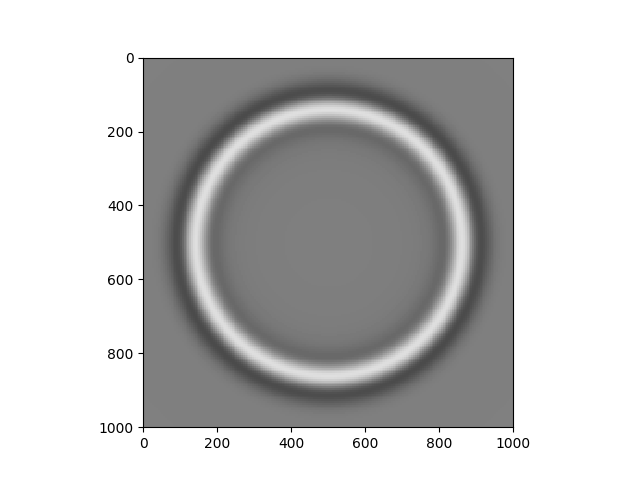

In [54]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as pl
from matplotlib.pyplot import draw, ion
import matplotlib.animation as anim
from math import *
from IPython.display import HTML
from IPython.display import display, Image


class wave2d :
  
  #Source pulse
  def ricker(self,fp,tp,M,dt) :
    s=np.zeros((M))
    for k in range(0,M):
      t=k*dt
      wp=2.0*3.14159*fp
      s[k] =(1-0.5*pow(wp,2)*pow((t-tp),2))*exp(-0.25*pow(wp,2)*pow(t-tp,2))
    return(s)


  def __init__(self) :
    self.dx = 5.0   # Case 1 Grid spacing
    self.dt = 0.0005 # (seconds)
    self.Tmax = 0.4
    self.Nt = 500
    self.Nx = 200 # Number of gridpoints in x-direction
    self.Ny = 200 # Number of gridpoints in y-direction
    self.Ns=100
    self.t = 0 

    #Source parameter
    self.f0=20.0 #Dominant freqiency (Hz)
    self.t0=0.05  #Time delay
    self.src= self.ricker(self.f0,self.t0,self.Nt,self.dt)
    
    #Source position
    self.ixs = int(self.Nx/2)
    self.iys = int(self.Ny/2)
    self.kappa  = np.zeros((self.Nx,self.Ny))
    self.rho    = np.zeros((self.Nx,self.Ny))
    
    #Animation parameters
    self.cnt=0
    self.inc=1
    self.animrun=True
    self.im=0

    #Simple model
    self.kappa[:,:] = 6.25e+09
    self.rho[:,:]    = 1000.0

    self.P0 = np.zeros((self.Nx,self.Ny))  #Past pressure
    self.P1 = np.zeros((self.Nx,self.Ny))  #Present pressure
    self.P2 = np.zeros((self.Nx,self.Ny))  #Future pressure
    self.ax= np.zeros((self.Nx,self.Ny))  #Future pressure
    self.ay = np.zeros((self.Nx,self.Ny))  #Future pressure

  #Forward derivative in x-direction
  def dxplus(self,A,dx) :
    nx = A.shape[0]
    ny = A.shape[1]
    dA = np.zeros((nx,ny))
    for j in range(0,ny) :
      for i in range(0,nx-1) :
        dA[i,j] = (A[i+1,j]-A[i,j])/dx
    return dA

  #Backward derivative in x-direction
  def dxminus(self,A,dx) :
    nx = A.shape[0]
    ny = A.shape[1]
    dA = np.zeros((nx,ny))
    for j in range(0,ny) :
      for i in range(1,nx) :
        dA[i,j] = (A[i,j]-A[i-1,j])/dx
    return dA

  #Forward derivative in y-direction
  def dyplus(self,A,dx) :
    nx = A.shape[0]
    ny = A.shape[1]
    dA = np.zeros((nx,ny))
    for i in range(0,nx) :
      for j in range(0,ny-1) :
        dA[i,j] = (A[i,j+1]-A[i,j])/dx
    return dA

#Backward derivative in y-direction
  def dyminus(self,A,dx) :
    nx = A.shape[0]
    ny = A.shape[1]
    dA = np.zeros((nx,ny))
    for i in range(0,nx) :
      for j in range(1,ny) :
        dA[i,j] = (A[i,j]-A[i,j-1])/dx
    return dA

#Compute one timestep
  def tstep(self,t):
    #print("Timestep: ", k)
    #Compute accelerations
    self.ax = self.dxplus(self.P1,self.dx)
    self.ax = (1.0/self.rho)*self.ax
    self.ay = self.dyplus(self.P1,self.dx)
    self.ay = (1.0/self.rho)*self.ay

    self.ax = self.dxminus(self.ax,self.dx)
    self.ay = self.dyminus(self.ay,self.dx)

    self.P2 = 2*self.P1 - self.P0 + (self.dt*self.dt)*self.kappa*(self.ax+self.ay)
    self.P2[self.ixs,self.iys] = self.P2[self.ixs,self.iys] + (self.dt*self.dt)*self.src[t]/(self.dx*self.dx)

    self.P0=self.P1
    self.P1=self.P2
    return self.P2

  def updatefig(self,*args):
    ''' Callback function for updating each frame

    Arguments:
        *args: provided by callback

    Returns
        None
    '''
    
    im=self.im
    img = self.tstep(self.t) #Get the next frame
    im.set_array(img)        #Plot the frame 
    self.t =  self.t+1
    return(im,)


  def movie(self):
    #Plot frame no 0
    fig = pl.figure()
    img = self.tstep(0)
    self.t=1
    o1=0
    o2=0
    d1=self.dx
    d2=d1
    n1=self.Nx
    n2=self.Ny
    cmin=-1.0e-08
    cmax= 1.0e-08
    colormap="gray"
    self.im=pl.imshow(img,interpolation='nearest',clim=(cmin,cmax),
                 cmap=colormap,extent=[o1,o1+d1*n1,o2+d2*n2,o2],animated=True)
    #self.im=pl.imshow(img,interpolation='nearest',
     #       cmap=colormap,extent=[o1,o1+d1*n1,o2+d2*n2,o2],animated=True)
    ax=pl.gca()
    ar=1.0
    asr = 1.0/(ax.get_data_ratio()*ar)
    pl.Axes.set_aspect(ax,asr)
    #Animation loop
    ani = anim.FuncAnimation(fig, self.updatefig, frames=self.Nt-2, repeat=True, interval=100, blit=True)
    #pl.close(ani.fig)
    display(HTML(ani.to_html5_video()))
    
   
#Test the wave2d class
wave = wave2d()
wave.movie()
